In [1]:
#26/06/024

In [2]:
#DECISION TREE:-----

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("tested1.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [5]:
df.shape

(418, 11)

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [10]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,C


In [11]:
df.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [12]:
agemean=df["Age"].mean()
df["Age"].fillna(agemean,inplace=True) 

In [13]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
Le=LabelEncoder()

In [16]:
df["Sex"]=Le.fit_transform(df["Sex"])
df.dropna(inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.50000,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00000,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,8.0500,S


In [17]:
x=df.drop(["Survived","Name","Ticket","Embarked"],axis=1)
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,34.50000,0,0,7.8292
1,893,3,0,47.00000,1,0,7.0000
2,894,2,1,62.00000,0,0,9.6875
3,895,3,1,27.00000,0,0,8.6625
4,896,3,0,22.00000,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,3,1,30.27259,0,0,8.0500
414,1306,1,0,39.00000,0,0,108.9000
415,1307,3,1,38.50000,0,0,7.2500
416,1308,3,1,30.27259,0,0,8.0500


In [18]:
y=df["Survived"]

In [19]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,34.50000,0,0,7.8292
1,893,3,0,47.00000,1,0,7.0000
2,894,2,1,62.00000,0,0,9.6875
3,895,3,1,27.00000,0,0,8.6625
4,896,3,0,22.00000,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,3,1,30.27259,0,0,8.0500
414,1306,1,0,39.00000,0,0,108.9000
415,1307,3,1,38.50000,0,0,7.2500
416,1308,3,1,30.27259,0,0,8.0500


In [20]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 417, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train, y_test= train_test_split(x,y,test_size=2,random_state=50)

In [23]:
x_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
89,981,2,1,2.00000,1,1,23.0000
407,1299,1,1,50.00000,1,1,211.5000
115,1007,3,1,18.00000,1,0,14.4542
220,1112,2,0,30.00000,1,0,13.8583
325,1217,3,1,23.00000,0,0,7.0500
...,...,...,...,...,...,...,...
132,1024,3,0,30.27259,0,4,25.4667
290,1182,1,1,30.27259,0,0,39.6000
109,1001,2,1,18.50000,0,0,13.0000
396,1288,3,1,24.00000,0,0,7.2500


In [24]:
y_train

89     0
407    0
115    0
220    1
325    0
      ..
132    1
290    0
109    0
396    0
177    0
Name: Survived, Length: 415, dtype: int64

In [25]:
#27/06/024

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dc=DecisionTreeClassifier(max_depth=9)

In [28]:
dc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9)

In [29]:
DecisionTreeClassifier(max_depth=9)

DecisionTreeClassifier(max_depth=9)

In [30]:
dc.score(x_train,y_train)

1.0

In [31]:
dc.score(x_test,y_test)

1.0

In [32]:
from sklearn import tree

[Text(0.5, 0.75, 'x[2] <= 0.5\ngini = 0.463\nsamples = 415\nvalue = [264, 151]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 151\nvalue = [0, 151]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 264\nvalue = [264, 0]')]

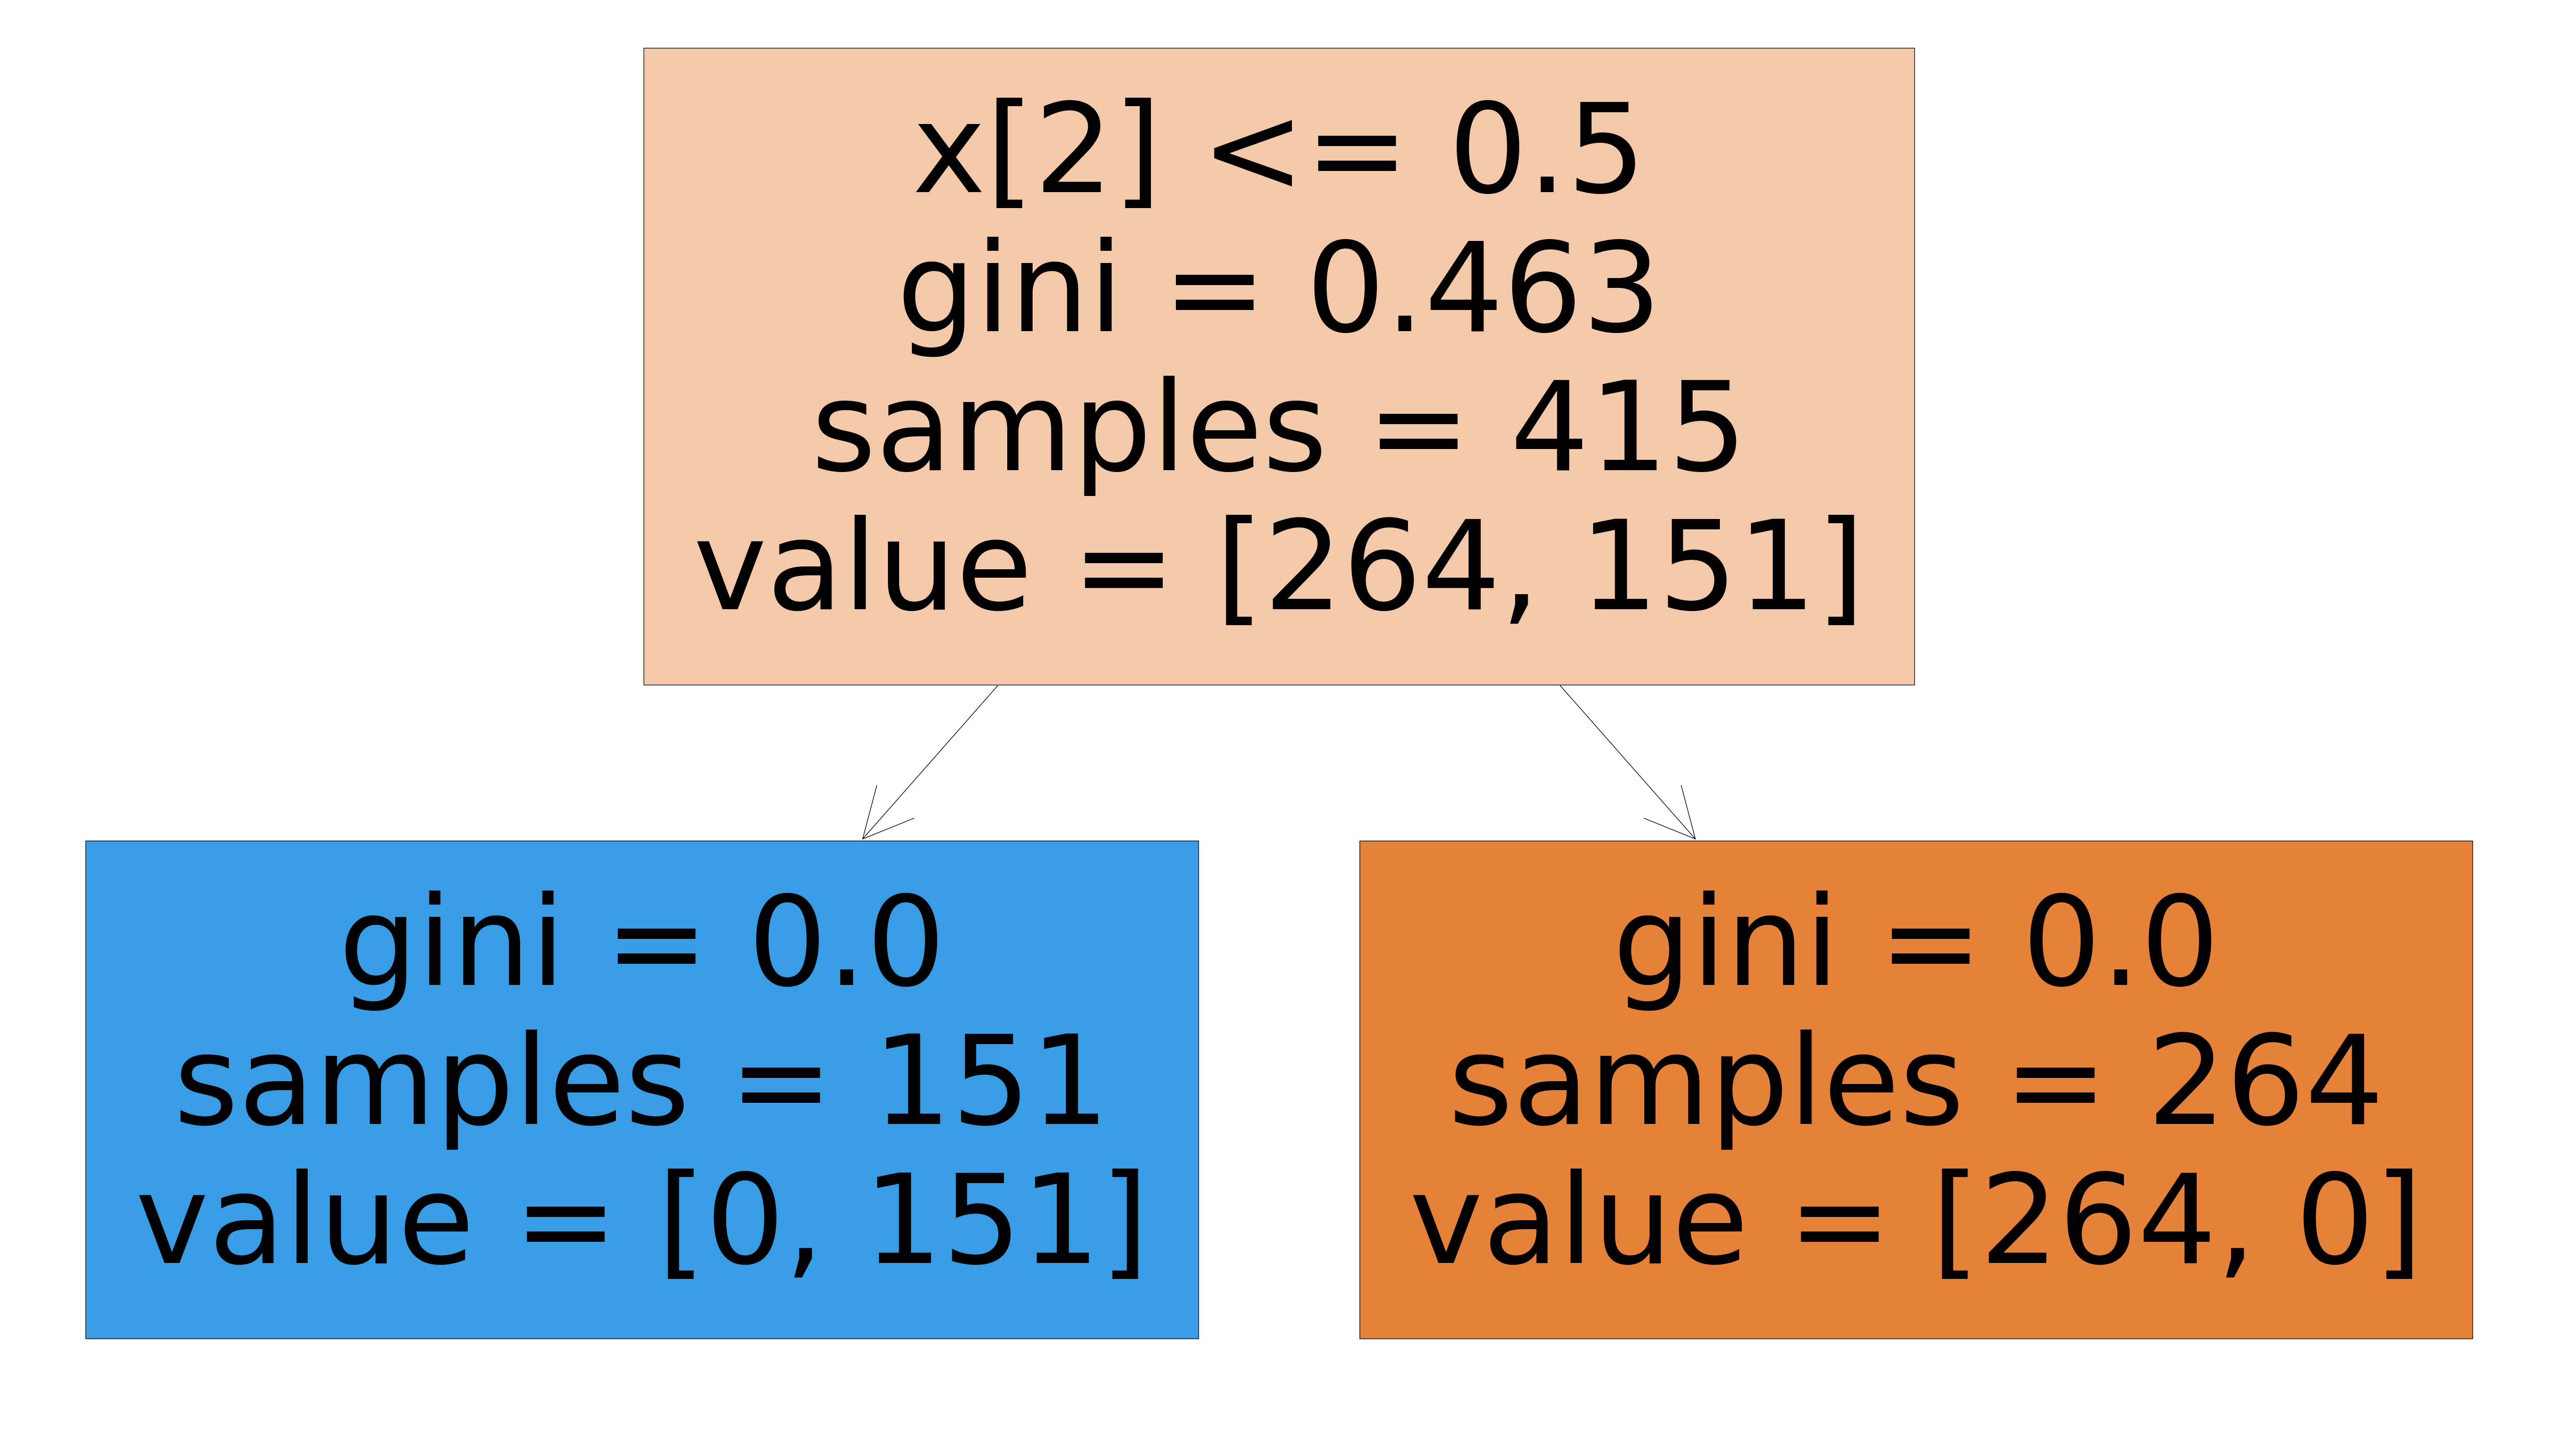

In [33]:
plt.figure(figsize=(70,40))
tree.plot_tree(dc,filled=tree)

In [35]:
dc.predict([[2,0,55,30,20,4,6,]])

array([0], dtype=int64)